In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [3]:
pk = Psikit()


  Memory set to   3.725 GiB by Python driver.
  Threads set to 4 by Python driver.


In [4]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571175906773

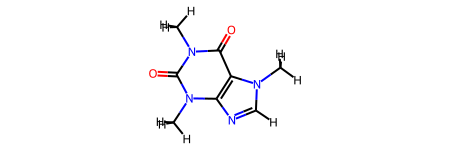

In [6]:
pk.mol

In [7]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20126142  0.07053638  0.08505954 -0.47140638  0.12577573 -0.10083401
  0.36409482 -0.4960092  -0.04595407  0.36252474 -0.5285877   0.02500887
  0.00605432 -0.03375549  0.1103659   0.1103659   0.1103659   0.17305142
  0.05004295  0.05004295  0.05004295  0.06149196  0.06149196  0.06149196]
[-0.11403953 -0.69387156  0.38640952 -0.62283936  0.63497403  0.09325894
  0.89978881 -0.63014379 -0.87904364  1.09566896 -0.62724372 -0.87749707
 -0.12040856 -0.12349385  0.12973196  0.16727753  0.16726889  0.18241272
  0.16750546  0.14895392  0.1489248   0.14560132  0.14560936  0.17519486]
[-0.13210082 -0.05233696  0.0773482  -0.27543924  0.13961204 -0.12549878
  0.29394259 -0.3945004  -0.1883033   0.34847995 -0.39857878 -0.15250971
 -0.13202201 -0.13825371  0.10404907  0.11675938  0.11778371  0.12133831
  0.11931928  0.10841295  0.10770443  0.10710539  0.10597679  0.1217116 ]


In [8]:
mol = pk.mol
atoms = mol.GetAtoms()

In [9]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [10]:
df = pd.DataFrame(data)

In [11]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.114,-0.132
1,N,0.071,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.471,-0.623,-0.275
4,C,0.126,0.635,0.140
5,C,-0.101,0.093,-0.125
6,C,0.364,0.900,0.294
7,O,-0.496,-0.630,-0.395
8,N,-0.046,-0.879,-0.188
9,C,0.363,1.096,0.348


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')

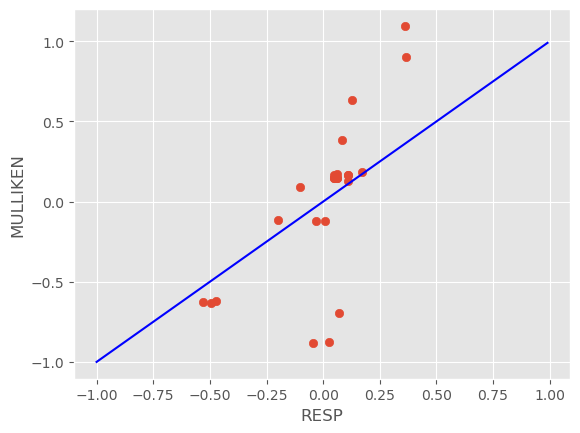

In [14]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

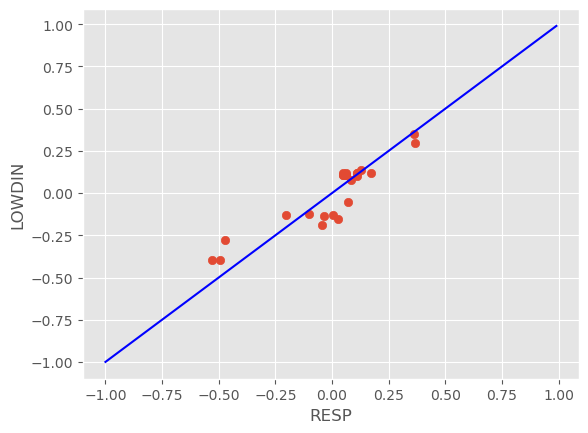

In [15]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

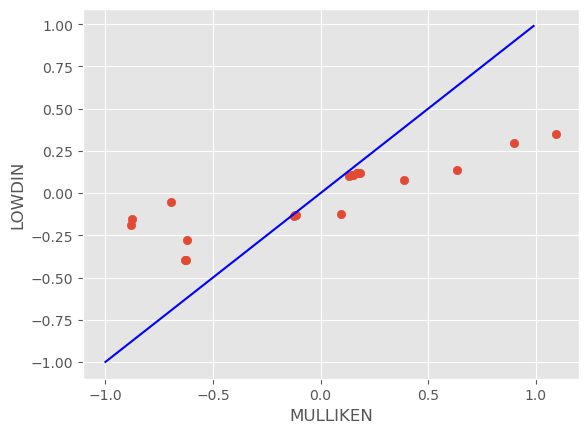

In [16]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')